In [19]:
# Install dependencies
!pip install tensorflow tensorflow_datasets



In [20]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow_datasets as tfds


In [21]:
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0        # Normalize image
    image = tf.expand_dims(image, -1)                 # Add channel dimension
    label = label - 1                                 # Convert labels 1–26 → 0–25
    return image, label


In [22]:
# Load EMNIST Letters dataset
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# Normalize and format input (Correct shape: 28x28x1)
# The normalize_img function is defined in a previous cell.
# def normalize_img(image, label):
#     image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1]
#     image = tf.expand_dims(image, -1)           # Add channel dimension
#     return image, label

batch_size = 128

ds_train = ds_train.map(normalize_img).cache().shuffle(10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_img).cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')  # 26 letters
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=10
)

Epoch 1/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 118s 162ms/step - accuracy: 0.5165 - loss: 1.6344 - val_accuracy: 0.8701 - val_loss: 0.4078
Epoch 2/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 118s 131ms/step - accuracy: 0.8098 - loss: 0.5969 - val_accuracy: 0.8920 - val_loss: 0.3339
Epoch 3/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 89s 128ms/step - accuracy: 0.8434 - loss: 0.4886 - val_accuracy: 0.8985 - val_loss: 0.3055
Epoch 4/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 89s 128ms/step - accuracy: 0.8663 - loss: 0.4185 - val_accuracy: 0.9076 - val_loss: 0.2724
Epoch 5/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 143s 130ms/step - accuracy: 0.8773 - loss: 0.3818 - val_accuracy: 0.9167 - val_loss: 0.2491
Epoch 6/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 95s 136ms/step - accuracy: 0.8844 - loss: 0.3545 - val_accuracy: 0.9164 - val_loss: 0.2483
Epoch 7/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 93s 134ms/step - accuracy: 0.8907 - loss: 0.3317 - val_accuracy: 0.9189 - val_loss: 0.2375
Epoch 8/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 139s 130ms/step - accuracy: 0.8953 - los

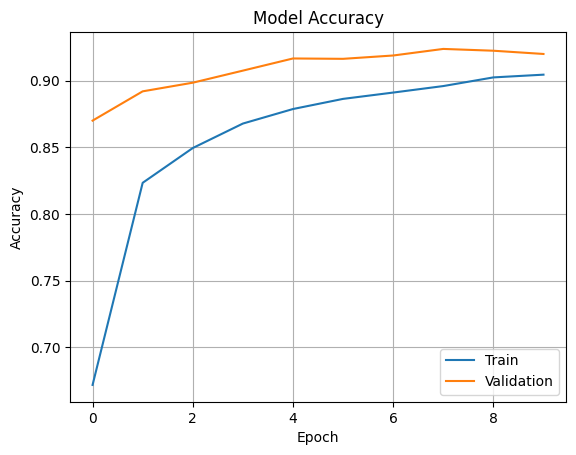

In [25]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()



In [26]:
def get_letter(index):
    return chr(index + 65)

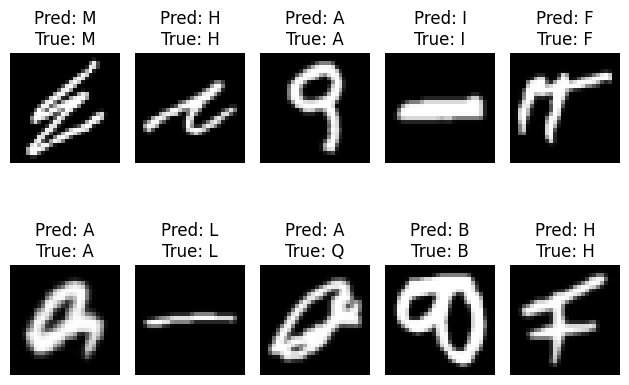

In [27]:
num_samples = 10
# Collect images and labels into separate lists
test_images = []
test_labels = []
for img, label in tfds.as_numpy(ds_test.unbatch().take(num_samples)):
    test_images.append(img)
    test_labels.append(label)

for i, (img, label) in enumerate(zip(test_images, test_labels)):
    input_img = img.reshape(1, 28, 28, 1)
    pred = model.predict(input_img, verbose=0)
    predicted_label = np.argmax(pred)

    plt.subplot(2, 5, i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {get_letter(predicted_label)}\nTrue: {get_letter(label)}")

plt.tight_layout()
plt.show()